# Outline

This notebook provides the data analysis performed for a bike sharing case-study. The company has two types of riders: casual and annual members. The goal of the study was to identify how annual members and casual riders use the bikes differently in order to help the marketing team whose target is to convert casual riders into annual members in the next campaign. The library Pandas from Python was used to perform the analysis, and Matplotlib was used to plot the results. The structure of the notebook will be as follows:
* Importing
* Exploration
* Cleaning
* Preparation
* Analysis

# Importing

In this section the python libraries that will be used in the rest of the notebook are imported. Next, an ordered list of the months is built. This list is needed so that when the dataframes are sorted by month, they can be sorted in the right order (Jan, Feb, ... etc). After that is the method read_data, which reads the .csv files into a multi-index DF. The method is called and the multi-index DF is then previewed to see what the data looks like.

In [28]:
import os
import pandas as pd
import numpy as np
import calendar         # to convert file numbers to name of month
import copy             # make a deep copy of a DF not just a pointer
import matplotlib.pyplot as plt

In [111]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [114]:
# input:    name of directory where the csv files are located
# output:   multi-index DF that contains entire dataset
def read_data(dir): 
    dfs = {}
    files = os.listdir(dir)

    csv_files = [file for file in files if file.endswith('.csv')] # files need to be filtered by .csv to excluse .DS_Store
    
    for csv_file in csv_files:
        month = calendar.month_name[int(csv_file[4:6])][0:3]
        dfs[month] = pd.read_csv(os.path.join(dir, csv_file) )

    all_data = pd.concat(dfs.values(), keys=dfs.keys())
    all_data = all_data.reorder_levels(order=[0, 1]).loc[month_order] # reorder DFs so that they have the right order

    all_data.index.names = ['Month', 'row_id']

    return all_data 

In [115]:
original_dir = "../../BikeShareData/OriginalData"
original_data = read_data(original_dir)
original_data

ride_id  rideable_type           started_at  \
Month row_id                                                         
Jan   0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
      1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
      2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
      3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
      4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                        ...            ...                  ...   
Dec   224068  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
      224069  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
      224070  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
      224071  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
      224072  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                         ended_at           start_station_name  \
Month row_id                                                     
Jan   0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave   
      1       2023-01-10 15:46:05        Kimbark Ave & 53rd St   
      2       2023-01-02 08:05:11       Western Ave & Lunt Ave   
      3       2023-01-22 11:01:44        Kimbark Ave & 53rd St   
      4       2023-01-12 14:13:20        Kimbark Ave & 53rd St   
...                           ...                          ...   
Dec   224068  2023-12-07 13:17:37            900 W Harrison St   
      224069  2023-12-08 18:45:56            900 W Harrison St   
      224070  2023-12-05 14:13:01            900 W Harrison St   
      224071  2023-12-02 21:53:45       Damen Ave & Madison St   
      224072  2023-12-11 13:11:24            900 W Harrison St   

             start_station_id                end_station_name end_station_id  \
Month row_id                                                                   
Jan   0          TA1309000058       Hampden Ct & Diversey Ave       202480.0   
      1          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
      2                RP-005  Valli Produce - Evanston Plaza            599   
      3          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
      4          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
...                       ...                             ...            ...   
Dec   224068            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224069            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224070            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224071            13134            Morgan St & Lake St*   chargingstx4   
      224072            13028      Racine Ave & Congress Pkwy   TA1306000025   

              start_lat  start_lng    end_lat    end_lng member_casual  
Month row_id                                                            
Jan   0       41.924074 -87.646278  41.930000 -87.640000        member  
      1       41.799568 -87.594747  41.809835 -87.599383        member  
      2       42.008571 -87.690483  42.039742 -87.699413        casual  
      3       41.799568 -87.594747  41.809835 -87.599383        member  
      4       41.799568 -87.594747  41.809835 -87.599383        member  
...                 ...        ...        ...        ...           ...  
Dec   224068  41.874702 -87.649804  41.874640 -87.657030        casual  
      224069  41.874754 -87.649807  41.874640 -87.657030        casual  
      224070  41.874754 -87.649807  41.874640 -87.657030        member  
      224071  41.881396 -87.674984  41.885492 -87.652289        casual  
      224072  41.874754 -87.649807  41.874640 -87.657030        member  

[5719877 rows x 13 columns]

In [116]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5719877 entries, ('Jan', 0) to ('Dec', 224072)
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 616.6+ MB


# Exploration
In this section the dataset is explored.

#### Dataset size & duplicates:
Here the size of the total dataset is calculated, the size per month, and the average across the entire year. These results are returned as a series, which is then visualised using a bar chart. Afterwards, the duplicates are dropped and the size is calculated again. This is done using the following methods:
* count_entries: returns a series whose index is the month, and value is no of rides in that month. 
* print_series: prints it out with the size of the total dataset, and the average across months

In [15]:
# input:    dataset and title of printout
# output:   series whose index is the month, and value is no of rides in that month
def count_entries(dataset):
    size_series = dataset.groupby('Month').size().reindex(month_order)
    return size_series

In [16]:
# input:    size series calculated by count_entries
# output:   print out of series formatted, total, and average
def print_series(series, title):
    print(f"\033[1m{title}: \033[0m")
    
    size_series_formatted = series.apply(lambda x: format(x, ',')) # since numbers are large, comma makes them easier to read
    
    print(size_series_formatted)
    print("")
    print(f"\033[1mTotal in 2023:\t    {format(series.sum(), ',')}\033[0m")
    print(f"\033[1mAvg. per month:\t    {format(int(series.mean()), ',')}\033[0m")

Here, the method count_entries is called with the original dataset

In [117]:
size_series = count_entries(original_data)
print_series(size_series, "No of BikeRides Original")

No of BikeRides Original: 
Month
Jan    190,301
Feb    190,445
Mar    258,678
Apr    426,590
May    604,827
Jun    719,618
Jul    767,650
Aug    771,693
Sep    666,371
Oct    537,113
Nov    362,518
Dec    224,073
dtype: object

Total in 2023:	    5,719,877
Avg. per month:	    476,656


Visualisation of the size series

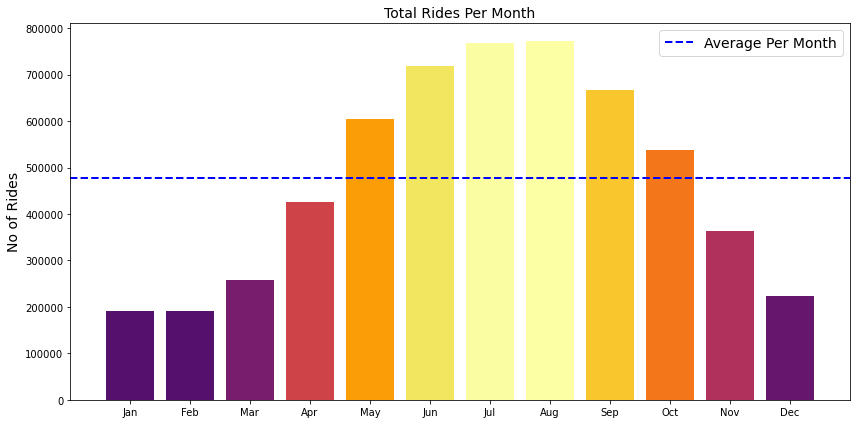

In [119]:
fig, axes = plt.subplots(figsize=(12,6))
cmap = plt.get_cmap('inferno')

y = size_series.values
x = np.arange(len(y))

plt.bar(x, y, color=cmap(y / max(y)))
plt.axhline(size_series.mean(), color='blue', linestyle='--', linewidth=2, label="Average Per Month")
plt.ylabel("No of Rides", fontsize=14)
plt.xticks(x, labels=month_order)
plt.title("Total Rides Per Month", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('../Visualisations/no_of_rides_per_month.pdf')
plt.savefig('../Report/Latex/images/no_of_rides_per_month.pdf')
plt.show()

Now, the method count_entries is called again using the dataset without duplicates

In [120]:
data_without_duplicates = original_data.drop_duplicates()
size_series_wo_dup = count_entries(data_without_duplicates)
print_series(size_series_wo_dup,"No of BikeRides without Duplicates")

No of BikeRides without Duplicates: 
Month
Jan    190,301
Feb    190,445
Mar    258,678
Apr    426,590
May    604,827
Jun    719,618
Jul    767,650
Aug    771,693
Sep    666,371
Oct    537,113
Nov    362,518
Dec    224,073
dtype: object

Total in 2023:	    5,719,877
Avg. per month:	    476,656


The no of entries after removing the duplicates is identical to the original, i.e. the original dataset did not contain any duplicates. 

#### Null Values:
Next I look at the percentage of null values in each column. This is done using the following methods:
* get_null_percentage:  returns the DF that is the result of grouping by month and getting null percentage per column which is done using the helper method get_percentage
* get_percentage: takes the Df for each month, finds the null percentage, formats the percentage 

In [46]:
# input:    DF that results from a grouping by month
# output:   sum of null percentage for each column
def get_percentage(x):
    null_values = ((x.isna().sum(axis=0))*100/len(x))
    as_percent = null_values.apply(lambda y: str(int(y))+"%" if y > 1 else ("< 1%" if y > 0 else str(0)))
    return as_percent

# input:    dataset
# output:   DF that is the result of grouping by month and getting null percentage per column
def get_null_percentage(dataset):
    #                        groupby by month , for each month df apply the function get_percentage
    nan_per_column = dataset.groupby('Month').apply(lambda x: get_percentage(x)).reindex(month_order)
    return nan_per_column

In [121]:
nans = get_null_percentage(original_data)
nans

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
Month,,,,,,,,,,,,,
Jan,0,0,0,0,14%,14%,14%,14%,0,0,< 1%,< 1%,0
Feb,0,0,0,0,13%,13%,14%,14%,0,0,< 1%,< 1%,0
Mar,0,0,0,0,13%,13%,14%,14%,0,0,< 1%,< 1%,0
Apr,0,0,0,0,14%,14%,16%,16%,0,0,< 1%,< 1%,0
May,0,0,0,0,14%,14%,15%,15%,0,0,< 1%,< 1%,0
Jun,0,0,0,0,16%,16%,17%,17%,0,0,< 1%,< 1%,0
Jul,0,0,0,0,16%,16%,16%,16%,0,0,< 1%,< 1%,0
Aug,0,0,0,0,15%,15%,16%,16%,0,0,< 1%,< 1%,0
Sep,0,0,0,0,15%,15%,16%,16%,0,0,< 1%,< 1%,0


#### Unique values:
* get_unique: prints out the number of unique values for each column within a certain month.

In [48]:
# input: dataset
# output: printout of series, the index is the column name, and the values are no of unique values
#         then printout of unique values in columns rideable_type and member_casual
def get_unique(dataset, month):
    print("\033[1mColumn Name          NUnique Values \033[0m")
    print(dataset.loc[month].nunique().apply(lambda x: format(x, ',')))
    print("")
    print(dataset.loc[month].rideable_type.unique())
    print(dataset.loc[month].member_casual.unique())

In [87]:
month = "May"
get_unique(original_data, month)

Column Name          NUnique Values 
ride_id               604,827
rideable_type               3
started_at            503,683
ended_at              505,259
start_station_name      1,287
start_station_id        1,250
end_station_name        1,254
end_station_id          1,210
start_lat             188,591
start_lng             185,410
end_lat                 4,759
end_lng                 4,762
member_casual               2
dtype: object

['electric_bike' 'classic_bike' 'docked_bike']
['member' 'casual']


Looking at the started_at and ended_at, we can see that they have less unqiue values than the total number of entries. First I calculate the percentage of non-unique values in the column started_at for May. Then, I look at the first entries that have the same started_at. 

In [57]:
month = "May"
total = len(original_data.loc[month])
started = original_data.loc[month].started_at.nunique()
print(f"Total in {month}: {total}\t")
print("Started_At: ",started)
print(f"Percent: {int((total-started)*100/total)}%",)

Total in May: 604827	
Started_At:  503683
Percent: 16%


Here i get the first entries that have the same started_at

In [18]:
# this is a series of flags, True if unique, False if there exists another entry like this one
duplicated_flags = original_data.loc["May"].started_at.duplicated()
# use the flags to retrieve entries where duplicated == True
get_duplicates = original_data.loc["May"][duplicated_flags]
# get the started_at time for first row in the duplicates
first_duplicate = get_duplicates.iloc[0].started_at
# find the rest of the entries that match the same started_at as the first one retrieved from the duplicates
matching_duplicates = original_data.loc["May"][original_data.loc["May"].started_at == first_duplicate]
matching_duplicates

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
row_id,,,,,,,,,,,,,
727,041763A703C94783,electric_bike,2023-05-28 14:59:58,2023-05-28 15:12:47,Kedzie Ave & Milwaukee Ave,13085,Kilpatrick Ave & Parker Ave,358,41.929673,-87.708045,41.930731,-87.744106,casual
2710,5AEC034DB275854E,electric_bike,2023-05-28 14:59:58,2023-05-28 15:26:56,Broadway & Belmont Ave,13277,NaN,NaN,41.940170,-87.645626,41.960000,-87.640000,casual
400665,A99D22D37DC92962,electric_bike,2023-05-28 14:59:58,2023-05-28 15:09:35,NaN,NaN,MTV Hubbard St,021320,41.880000,-87.660000,41.889779,-87.680341,member
557920,79A55702C0B6D246,docked_bike,2023-05-28 14:59:58,2023-05-28 16:24:12,Streeter Dr & Grand Ave,13022,Field Museum,13029,41.892278,-87.612043,41.865312,-87.617867,casual


Despite it being unlikely that more than one rider start their rides at the exact same time down to the second, it looks like this does happen. And maybe this is due to the dataset being quite large. 

# Cleaning
In this section the dataset is cleaned. This is done by two methods:
* drop_and_change_format: drops the columns with NAN values and ride_id, and converts the started and ended_at to datetime. Also returns a serie of Flags that are True if the ended_at time is before the started_at time. 
* clean_data: removes the entries where the ended_at time is before the started_at time. 

In [89]:
# input: dataset
# output:   1. dataset where all columns related to location and ride_id are dropped
#           and started(ended)_at are converted to datetime
#           2. series which contains flags True if ended_at before start_at
def drop_and_change_format(dataset):
    cols_to_drop = ['ride_id','start_station_name', 'end_station_name', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
    cleand_data1 = dataset.drop(columns = cols_to_drop)

    # convert to datetime
    cleand_data1.started_at, cleand_data1.ended_at  = pd.to_datetime(cleand_data1.started_at), pd.to_datetime(cleand_data1.ended_at)

    # series of flags
    ended_before_started = cleand_data1.ended_at < cleand_data1.started_at
    
    return cleand_data1, ended_before_started

In [122]:
cleaned_data1, end_before_start = drop_and_change_format(original_data)
cleaned_data1

rideable_type          started_at            ended_at  \
Month row_id                                                          
Jan   0       electric_bike 2023-01-21 20:05:42 2023-01-21 20:16:33   
      1        classic_bike 2023-01-10 15:37:36 2023-01-10 15:46:05   
      2       electric_bike 2023-01-02 07:51:57 2023-01-02 08:05:11   
      3        classic_bike 2023-01-22 10:52:58 2023-01-22 11:01:44   
      4        classic_bike 2023-01-12 13:58:01 2023-01-12 14:13:20   
...                     ...                 ...                 ...   
Dec   224068  electric_bike 2023-12-07 13:15:24 2023-12-07 13:17:37   
      224069   classic_bike 2023-12-08 18:42:21 2023-12-08 18:45:56   
      224070   classic_bike 2023-12-05 14:09:11 2023-12-05 14:13:01   
      224071  electric_bike 2023-12-02 21:36:07 2023-12-02 21:53:45   
      224072   classic_bike 2023-12-11 13:07:46 2023-12-11 13:11:24   

             member_casual  
Month row_id                
Jan   0             member  
      1             member  
      2             casual  
      3             member  
      4             member  
...                    ...  
Dec   224068        casual  
      224069        casual  
      224070        member  
      224071        casual  
      224072        member  

[5719877 rows x 4 columns]

In [91]:
cleaned_data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5719877 entries, ('January', 0) to ('December', 224072)
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   rideable_type  object        
 1   started_at     datetime64[ns]
 2   ended_at       datetime64[ns]
 3   member_casual  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 223.8+ MB


In [123]:
# check that original_data is unaffected
original_data

ride_id  rideable_type           started_at  \
Month row_id                                                         
Jan   0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
      1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
      2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
      3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
      4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                        ...            ...                  ...   
Dec   224068  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
      224069  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
      224070  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
      224071  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
      224072  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                         ended_at           start_station_name  \
Month row_id                                                     
Jan   0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave   
      1       2023-01-10 15:46:05        Kimbark Ave & 53rd St   
      2       2023-01-02 08:05:11       Western Ave & Lunt Ave   
      3       2023-01-22 11:01:44        Kimbark Ave & 53rd St   
      4       2023-01-12 14:13:20        Kimbark Ave & 53rd St   
...                           ...                          ...   
Dec   224068  2023-12-07 13:17:37            900 W Harrison St   
      224069  2023-12-08 18:45:56            900 W Harrison St   
      224070  2023-12-05 14:13:01            900 W Harrison St   
      224071  2023-12-02 21:53:45       Damen Ave & Madison St   
      224072  2023-12-11 13:11:24            900 W Harrison St   

             start_station_id                end_station_name end_station_id  \
Month row_id                                                                   
Jan   0          TA1309000058       Hampden Ct & Diversey Ave       202480.0   
      1          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
      2                RP-005  Valli Produce - Evanston Plaza            599   
      3          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
      4          TA1309000037         Greenwood Ave & 47th St   TA1308000002   
...                       ...                             ...            ...   
Dec   224068            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224069            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224070            13028      Racine Ave & Congress Pkwy   TA1306000025   
      224071            13134            Morgan St & Lake St*   chargingstx4   
      224072            13028      Racine Ave & Congress Pkwy   TA1306000025   

              start_lat  start_lng    end_lat    end_lng member_casual  
Month row_id                                                            
Jan   0       41.924074 -87.646278  41.930000 -87.640000        member  
      1       41.799568 -87.594747  41.809835 -87.599383        member  
      2       42.008571 -87.690483  42.039742 -87.699413        casual  
      3       41.799568 -87.594747  41.809835 -87.599383        member  
      4       41.799568 -87.594747  41.809835 -87.599383        member  
...                 ...        ...        ...        ...           ...  
Dec   224068  41.874702 -87.649804  41.874640 -87.657030        casual  
      224069  41.874754 -87.649807  41.874640 -87.657030        casual  
      224070  41.874754 -87.649807  41.874640 -87.657030        member  
      224071  41.881396 -87.674984  41.885492 -87.652289        casual  
      224072  41.874754 -87.649807  41.874640 -87.657030        member  

[5719877 rows x 13 columns]

Here i find the entries where the ended_at is before the started_at

In [124]:
end_before_start_DF = cleaned_data1[:][end_before_start]
end_before_start_DF

rideable_type          started_at            ended_at  \
Month row_id                                                          
Feb   189347  electric_bike 2023-02-04 13:08:08 2023-02-04 13:04:52   
Apr   361967  electric_bike 2023-04-04 17:15:08 2023-04-04 17:15:05   
      361983   classic_bike 2023-04-19 14:47:18 2023-04-19 14:47:14   
      362063  electric_bike 2023-04-27 07:51:14 2023-04-27 07:51:09   
      363359  electric_bike 2023-04-06 23:09:31 2023-04-06 23:00:35   
...                     ...                 ...                 ...   
Dec   54495   electric_bike 2023-12-12 20:17:56 2023-12-12 20:17:55   
      64671    classic_bike 2023-12-11 19:31:28 2023-12-11 19:31:27   
      117303  electric_bike 2023-12-07 16:43:01 2023-12-07 16:42:59   
      133133  electric_bike 2023-12-05 18:04:30 2023-12-05 18:04:29   
      220106  electric_bike 2023-12-06 16:07:40 2023-12-06 16:07:37   

             member_casual  
Month row_id                
Feb   189347        member  
Apr   361967        member  
      361983        member  
      362063        casual  
      363359        member  
...                    ...  
Dec   54495         casual  
      64671         member  
      117303        member  
      133133        member  
      220106        member  

[272 rows x 4 columns]

Remove entries where ended before started

In [95]:
def clean_data(dataset, flags):
    clean =  dataset[:][flags == False]
    return clean

In [125]:
cleaned_data = clean_data(cleaned_data1, end_before_start)
cleaned_data

rideable_type          started_at            ended_at  \
Month row_id                                                          
Jan   0       electric_bike 2023-01-21 20:05:42 2023-01-21 20:16:33   
      1        classic_bike 2023-01-10 15:37:36 2023-01-10 15:46:05   
      2       electric_bike 2023-01-02 07:51:57 2023-01-02 08:05:11   
      3        classic_bike 2023-01-22 10:52:58 2023-01-22 11:01:44   
      4        classic_bike 2023-01-12 13:58:01 2023-01-12 14:13:20   
...                     ...                 ...                 ...   
Dec   224068  electric_bike 2023-12-07 13:15:24 2023-12-07 13:17:37   
      224069   classic_bike 2023-12-08 18:42:21 2023-12-08 18:45:56   
      224070   classic_bike 2023-12-05 14:09:11 2023-12-05 14:13:01   
      224071  electric_bike 2023-12-02 21:36:07 2023-12-02 21:53:45   
      224072   classic_bike 2023-12-11 13:07:46 2023-12-11 13:11:24   

             member_casual  
Month row_id                
Jan   0             member  
      1             member  
      2             casual  
      3             member  
      4             member  
...                    ...  
Dec   224068        casual  
      224069        casual  
      224070        member  
      224071        casual  
      224072        member  

[5719605 rows x 4 columns]

# Preparation

In order to prepare the data for analysis, two columns are added: ride_length, and day_of_week.

In [97]:
# input: dataset
# output: new dataset with extra columns: ride_length and day_of_week
def prepare_data(dataset):
    prep_data   = copy.deepcopy(dataset)
    length      = prep_data.ended_at - prep_data.started_at              # this has unit of timedelta, which we cannot be used to aggregate
    length      = length.dt.seconds + length.dt.days*24*3600             # convert timedelta to seconds

    prep_data.insert(len(prep_data.columns), "ride_length", length)
    prep_data.insert(len(prep_data.columns), "day_of_week", prep_data.started_at.dt.day_name())

    prep_data = prep_data.drop(columns = ['started_at', 'ended_at'])

    return prep_data

In [126]:
prepared_data = prepare_data(cleaned_data)
prepared_data

rideable_type member_casual  ride_length day_of_week
Month row_id                                                      
Jan   0       electric_bike        member          651    Saturday
      1        classic_bike        member          509     Tuesday
      2       electric_bike        casual          794      Monday
      3        classic_bike        member          526      Sunday
      4        classic_bike        member          919    Thursday
...                     ...           ...          ...         ...
Dec   224068  electric_bike        casual          133    Thursday
      224069   classic_bike        casual          215      Friday
      224070   classic_bike        member          230     Tuesday
      224071  electric_bike        casual         1058    Saturday
      224072   classic_bike        member          218      Monday

[5719605 rows x 4 columns]

# Analysis

In order to analise how casual riders differ from members several aspects are investigated in the following methods:
* count_rides_per_rider: returns a pivot table which has the number of rides per rider type per month, and list which contains the sum
*

In [164]:
# input: dataset
# output: pivot table => no of rides per rider type per month, and sum values
def count_rides_per_rider(dataset):
    count_df = dataset.pivot_table(index=['Month'], columns=['member_casual'], values="rideable_type", aggfunc={'rideable_type': [('No of Rides', 'count')]})
    Totals = [count_df[('No of Rides','casual')].sum(), count_df[('No of Rides','member')].sum()]
    count_df = count_df.reindex(month_order)
    return count_df, Totals

In [165]:
count_df, totals = count_rides_per_rider(prepared_data)
count_df_formatted = count_df.applymap(lambda x: format(x, ','))
display(count_df_formatted)
print(f"\033[1m Year 2023:  {format(totals[0], ',')}  {format(totals[1], ',')} \033[0m")

No of Rides         
member_casual      casual   member
Month                             
Jan                40,008  150,293
Feb                43,016  147,428
Mar                62,201  196,477
Apr               147,284  279,302
May               234,178  370,639
Jun               301,226  418,385
Jul               331,344  436,276
Aug               311,095  460,538
Sep               261,603  404,718
Oct               177,055  360,022
Nov                98,357  264,097
Dec                51,670  172,393

 Year 2023:  2,059,037  3,660,568 


Here i find the percentage of members vs casual riders, in the whole year and in particular months

In [143]:
print("For whole year:")
print(f"casual: {totals[0]*100/size_series.sum()}")
print(f"member: {totals[1]*100/size_series.sum()}")

For whole year:
casual: 35.99792443089248
member: 63.99732022209569


In [147]:
month = "Jan"
print(f"For {month}:")
cas = count_df.loc[month][('No of Rides','casual')]
mem = count_df.loc[month][('No of Rides','member')]
print(f"casual: {cas*100/(cas+mem)}")
print(f"member: {mem*100/(cas+mem)}")

For Jan:
casual: 21.023536397601696
member: 78.97646360239831


Visualisation of the pivot table information in count_df

<AxesSubplot:title={'center':'No of Rides per Ride Type'}>

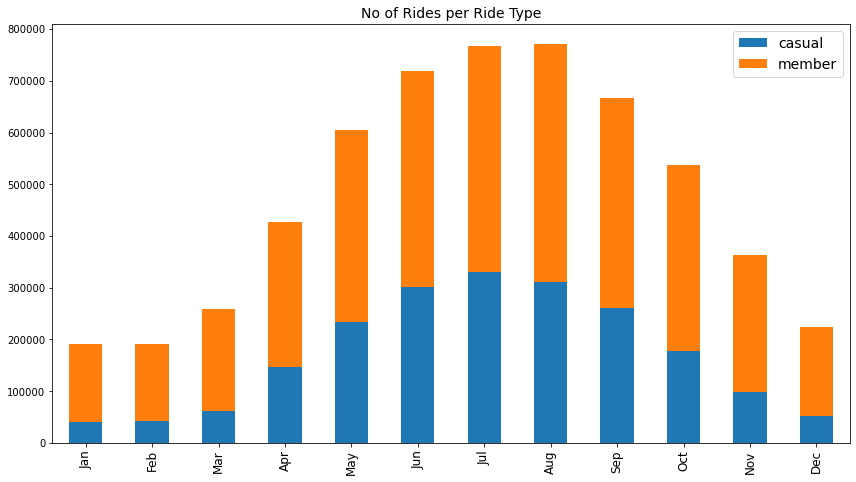

In [137]:
img = count_df.plot(kind="bar", stacked=True, figsize=(12,6.8))
img.set_xlabel("")
img.set_title("No of Rides per Ride Type", fontsize=14)
img.tick_params(axis='x', labelsize=12)
legend_labels = ['casual', 'member']
plt.legend(legend_labels, fontsize=14)
plt.tight_layout()

img.get_figure().savefig('../Report/Latex/images/no_of_rides.pdf')
img.get_figure().savefig('../Visualisations/no_of_rides.pdf')
img

NEw sub section here

In [37]:
#23
# converts seconds into string HH:MM:SS format or DD days HH:MM:SS
def format_time(seconds):
    # if the input is an integer or a float
    if isinstance(seconds,int) or isinstance(seconds,float):    
        min, sec    = divmod(seconds, 60)
        hour, min   = divmod(min, 60)

        if hour >= 24:
            day, hour   = divmod(hour, 24)
            return '%02d days %02d:%02d:%02d' % (day, hour, min, sec)
        
        return '%02d:%02d:%02d' % (hour, min, sec)
    
    return seconds

def seconds_minutes(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/60)
    else:
        return seconds
    
def seconds_hours(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/(60*60))
    else:
        return seconds

def seconds_days(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/(60*60*24))
    else:
        return seconds

In [63]:
#input:  dataset, and what to use in order to groupby
#output: dataframe which contains statistics per month, and list of whole year statistics
def mean_max_mode(dataset, list_to_groupby=['Month']):
    
    df = dataset.groupby(list_to_groupby).agg({'ride_length':['mean','max'], 
                                               'day_of_week': [('mode', lambda x: x.mode().iloc[0])]})

    year_statistics  = [format_time(df['ride_length','mean'].mean()), format_time(df['ride_length','max'].max()), df['day_of_week','mode'].mode()[0]]

    # plotting should be done here before converting the format
    #df.plot()

    # applymap works element-wise on the dataframe
    # convert seconds to timestaps
    df = df.applymap(format_time)

    # when the df has a single index then reindex, otherwise multi-index we have to use reorder
    df = df.reindex(month_order) if len(list_to_groupby) == 1 else df.reorder_levels(order=[0, 1]).loc[month_order]

    return df, year_statistics

In [64]:
mmm_allusers, stats = mean_max_mode(prepared_data)
display(mmm_allusers)
print(f"\033[1mYear 2023: {stats[0]}  {stats[1]} \t{stats[2]} \t\033[0m")

ride_length                   day_of_week
                 mean               max        mode
Month                                              
January      00:13:00  23 days 08:03:44     Tuesday
February     00:13:31  13 days 02:25:46     Tuesday
March        00:13:04  11 days 16:08:04   Wednesday
April        00:17:12  12 days 18:35:29    Saturday
May          00:19:02  20 days 06:50:31     Tuesday
June         00:19:59  20 days 11:05:58      Friday
July         00:21:44  35 days 17:41:24    Saturday
August       00:22:25  68 days 09:29:04   Wednesday
September    00:17:52  01 days 01:07:46    Saturday
October      00:15:41  01 days 00:59:57     Tuesday
November     00:13:49  01 days 01:00:25    Thursday
December     00:13:24  01 days 00:59:57      Friday

Year 2023: 00:16:44  68 days 09:29:04 	Tuesday 	


In [65]:
df2, stats2 = mean_max_mode(prepared_data, list_to_groupby=['Month', 'member_casual'])
display(df2)

ride_length                   day_of_week
                               mean               max        mode
Month     member_casual                                          
January   casual           00:22:54  23 days 08:03:44     Tuesday
          member           00:10:21  01 days 00:59:56     Tuesday
February  casual           00:23:11  13 days 02:25:46      Sunday
          member           00:10:42  01 days 00:59:56     Tuesday
March     casual           00:21:24  11 days 16:08:04   Wednesday
          member           00:10:26  01 days 01:59:40   Wednesday
April     casual           00:27:40  12 days 18:35:29    Saturday
          member           00:11:41  01 days 00:59:56    Thursday
May       casual           00:28:31  20 days 06:50:31      Sunday
          member           00:13:02  01 days 01:00:31     Tuesday
June      casual           00:29:24  20 days 11:05:58    Saturday
          member           00:13:12  01 days 00:59:56      Friday
July      casual           00:32:20  35 days 17:41:24    Saturday
          member           00:13:41  01 days 00:59:57      Monday
August    casual           00:35:14  68 days 09:29:04    Saturday
          member           00:13:46  01 days 00:59:57     Tuesday
September casual           00:25:11  01 days 01:07:46    Saturday
          member           00:13:08  01 days 00:59:57      Friday
October   casual           00:22:52  01 days 00:59:57      Sunday
          member           00:12:09  01 days 00:59:56     Tuesday
November  casual           00:19:54  01 days 01:00:25    Saturday
          member           00:11:34  01 days 00:59:56    Thursday
December  casual           00:19:56  01 days 00:59:57    Saturday
          member           00:11:26  01 days 00:59:56      Friday

In [38]:
#24
# Calculate the average and maximum ride_length for members and casual riders using pivot table
# input: dataset
# output: pivot table of average and maximum ride_length for members and casual riders
#         and array of mean and max across the year 
def mean_max_by_month(dataset):
    mm_member_casual = dataset.pivot_table(index="Month", columns='member_casual', values=["ride_length"], 
                         aggfunc={'ride_length':['max','mean']})

    mm_member_casual = mm_member_casual.reindex(month_order)

    stats  = [format_time(mm_member_casual['ride_length', 'mean', 'member'].mean()), 
          format_time(mm_member_casual['ride_length', 'mean', 'casual'].mean()), 
          format_time(mm_member_casual['ride_length','max', 'member'].max()),
          format_time(mm_member_casual['ride_length','max', 'casual'].max())]

    
    return mm_member_casual, stats

In [39]:
#25
mm_member_casual, stats = mean_max_by_month(prepared_data)
mm_member_casual_formated = mm_member_casual.applymap(format_time)

column_order = [('ride_length', 'mean', 'member'),
                ('ride_length', 'mean', 'casual'),
                ('ride_length', 'max', 'member'),
                ('ride_length', 'max', 'casual')]

mm_member_casual_formated = mm_member_casual_formated[column_order]
display(mm_member_casual_formated)
print(f"\033[1m    Year 2023:  {stats[0]}  {stats[1]}  {stats[2]} {stats[3]}\033[0m")

ride_length                                              
                     mean                         max                  
member_casual      member    casual            member            casual
Month                                                                  
January          00:10:21  00:22:54  01 days 00:59:56  23 days 08:03:44
February         00:10:42  00:23:11  01 days 00:59:56  13 days 02:25:46
March            00:10:26  00:21:24  01 days 01:59:40  11 days 16:08:04
April            00:11:41  00:27:40  01 days 00:59:56  12 days 18:35:29
May              00:13:02  00:28:31  01 days 01:00:31  20 days 06:50:31
June             00:13:12  00:29:24  01 days 00:59:56  20 days 11:05:58
July             00:13:41  00:32:20  01 days 00:59:57  35 days 17:41:24
August           00:13:46  00:35:14  01 days 00:59:57  68 days 09:29:04
September        00:13:08  00:25:11  01 days 00:59:57  01 days 01:07:46
October          00:12:09  00:22:52  01 days 00:59:56  01 days 00:59:57
November         00:11:34  00:19:54  01 days 00:59:56  01 days 01:00:25
December         00:11:26  00:19:56  01 days 00:59:56  01 days 00:59:57

    Year 2023:  00:12:06  00:25:42  01 days 01:59:40 68 days 09:29:04


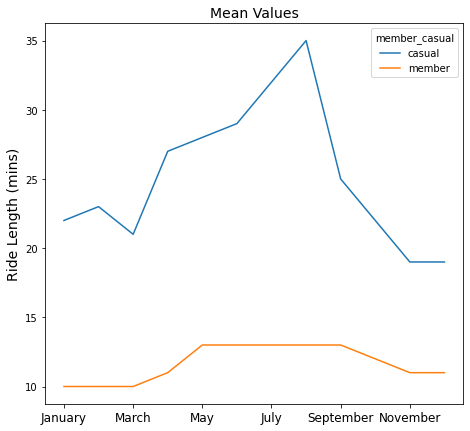

In [40]:
#26
img = mm_member_casual.applymap(seconds_minutes)[('ride_length', 'mean')].plot(figsize=(7.5,7))
img.set_ylabel("Ride Length (mins)", fontsize=14)
img.set_xlabel("", fontsize=14)
img.set_title("Mean Values", fontsize=14)
img.tick_params(axis='x', labelsize=12)
img.get_figure().savefig('../Report/images/mean_cvsm_month.pdf')

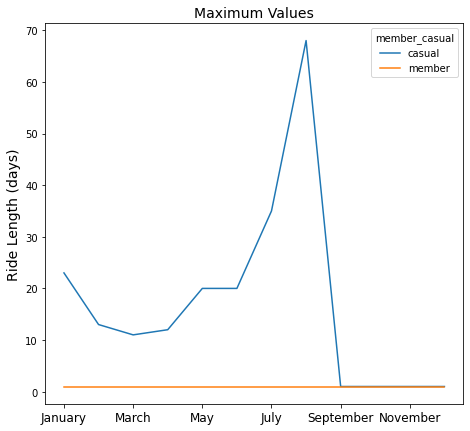

In [41]:
#27
img2 = mm_member_casual.applymap(seconds_days)[('ride_length', 'max')].plot(figsize=(7.5,7))
img2.set_ylabel("Ride Length (days)", fontsize=14)
img2.set_xlabel("", fontsize=14)
img2.set_title("Maximum Values", fontsize=14)
img2.tick_params(axis='x', labelsize=12)
img2.get_figure().savefig('../Report/images/max_cvsm.pdf')

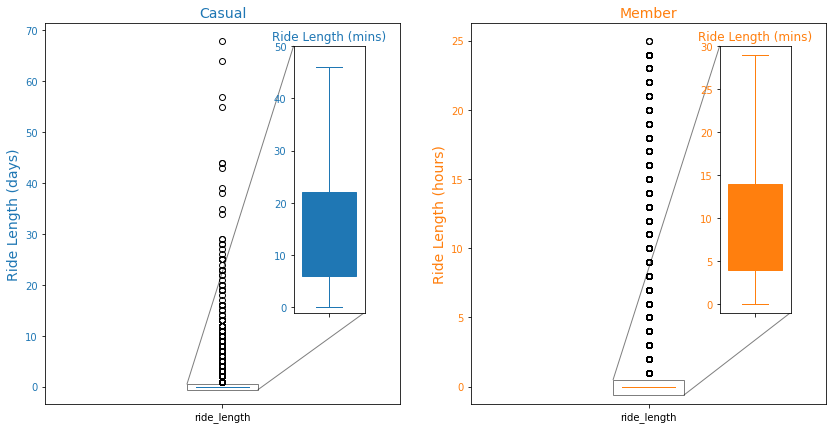

In [86]:
#28
# box plot of entire distribution, each rider type in separate plot
df = prepared_data#.loc['August']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

color = 'tab:blue'
axes[0].set_title('Casual', fontsize=14, color=color)
axes[0].set_ylabel('Ride Length (days)', fontsize=14, color=color)
df[df['member_casual'] == 'casual'].applymap(seconds_days).plot(kind='box', ax=axes[0], color=color, meanline=True)
axes[0].tick_params(axis='y', labelcolor=color)

# inset axes
x1, y1, x2, y2 = 0.9, -0.6, 1.1, 0.5  # subregion of the original image
                                #x0,   y0, width,height
ax_inset1 = axes[0].inset_axes( [0.7, 0.24, 0.2, 0.7], xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[], yticklabels=[])
axes[0].indicate_inset_zoom(ax_inset1, edgecolor="black")
df[df['member_casual'] == 'casual'].applymap(seconds_minutes).plot(kind='box', ax=ax_inset1, color=color, showfliers=False, patch_artist=True)
ax_inset1.set_ylim(-1,50)
ax_inset1.set_title('Ride Length (mins)', color=color)
ax_inset1.tick_params(axis='x', labelbottom=False)
ax_inset1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
axes[1].set_title('Member', fontsize=14, color=color)
axes[1].set_ylabel('Ride Length (hours)', fontsize=14, color=color)
df[df['member_casual'] == 'member'].applymap(seconds_hours).plot(kind='box', ax=axes[1], color=color)
axes[1].tick_params(axis='y', labelcolor=color)

# inset axes
ax_inset2 = axes[1].inset_axes( [0.7, 0.24, 0.2, 0.7], xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[], yticklabels=[])
axes[1].indicate_inset_zoom(ax_inset2, edgecolor="black")
df[df['member_casual'] == 'member'].applymap(seconds_minutes).plot(kind='box', ax=ax_inset2, color=color, showfliers=False, patch_artist=True)
ax_inset2.set_ylim(-1,30)
ax_inset2.set_title('Ride Length (mins)', color=color)
ax_inset2.tick_params(axis='x', labelbottom=False)
ax_inset2.tick_params(axis='y', labelcolor=color)

plt.show()
fig.savefig('../Report/images/boxplot_distribution.pdf')

In [ ]:
#29
# box plot of distribution without outliers, both rider types in same plot
df = prepared_data.applymap(seconds_minutes)
members = df[df.member_casual == 'member'].ride_length
casuals = df[df.member_casual == 'casual'].ride_length

fig, ax1 = plt.subplots(figsize=(6.4, 6.4))

box_plot_items = ax1.boxplot([casuals, members], showfliers=False, showmeans=True, labels=['casual', 'member'], patch_artist=True)
plt.title('Casual vs Member Ride Length Distribution', fontsize=14) 
plt.xlabel('Rider type', fontsize=14) 
plt.ylabel('Ride Length (mins)', fontsize=14) 

# colouring
colors1 = ['tab:blue', 'tab:orange']
colors2 = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']
wid = 3
for type in ['boxes', 'whiskers', 'caps', 'means', 'medians']:
    for i, box in enumerate(box_plot_items[type]):
        if type in ['boxes', 'medians']:
            box.set(color=colors1[i], linewidth=wid)
        elif type == 'means':
            box.set(marker='*', markersize=15)
        else:
            box.set(color=colors2[i], linewidth=wid)

    
# Get the quartiles, whiskers and means for both boxes
quartiles_data1 = [item.get_ydata()[0] for type in ['whiskers', 'caps', 'means'] for item in box_plot_items[type]]
all_ticks = sorted(quartiles_data1)

ax1.grid(True, axis='y')
ax1.set_yticks(all_ticks)
ax1.set_ylim(-1, 50)

plt.savefig('../Report/images/boxplot_distribution2.pdf')
plt.show()

In [ ]:
#Calculate the number of rides for users by day_of_week
dataset = prepared_data
count_day_of_week = dataset.pivot_table(index=["Month", 'member_casual'], columns="day_of_week", values="rideable_type", aggfunc={'rideable_type': [('No of Rides', 'count')]})

count_day_of_week.plot()
col_order = [('No of Rides', 'Monday'), ('No of Rides','Tuesday'), ('No of Rides','Wednesday'), ('No of Rides','Thursday'), ('No of Rides','Friday'), ('No of Rides','Saturday'), ('No of Rides','Sunday')]

count_day_of_week = count_day_of_week[col_order]#.reindex(month_order)
count_day_of_week

In [44]:
#30
# Calculate the average ride_length for members and casual riders by day_of_week
def mean_by_day_of_week(dataset):
    mean_day_of_week = dataset.pivot_table(index=["day_of_week"], columns="member_casual", values="ride_length", aggfunc={'ride_length':'mean'})

    row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mean_day_of_week = mean_day_of_week.reindex(row_order)
    mean_day_of_week = mean_day_of_week.rename(index={'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday':'Thu', 'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'})
    return mean_day_of_week

In [45]:
#31
mean_day_of_week = mean_by_day_of_week(prepared_data)
mean_day_of_week_formated = mean_day_of_week.applymap(format_time)
print("")
print("")
display(mean_day_of_week_formated)
print("")
print("")

member_casual,casual,member
day_of_week,,
Mon,00:27:42,00:11:54
Tue,00:25:05,00:12:00
Wed,00:24:18,00:11:56
Thu,00:24:43,00:12:01
Fri,00:27:15,00:12:28
Sat,00:32:08,00:13:56
Sun,00:32:51,00:13:59


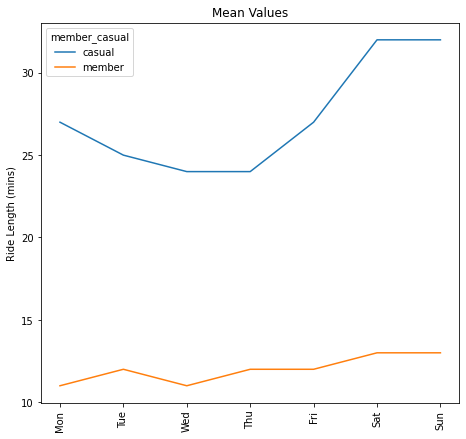

In [46]:
#32
img3 = mean_day_of_week.applymap(seconds_minutes).plot(figsize=(7.5,7))
img3.set_xlabel('')
img3.tick_params(axis='x', rotation=90)
img3.set_ylabel("Ride Length (mins)")
img3.set_title("Mean Values")
img3.get_figure().savefig('../Report/images/mean_cvsm_dayofweek.pdf')

In [178]:
prepared_data

rideable_type member_casual  ride_length day_of_week
Month    row_id                                                      
January  0       electric_bike        member          651    Saturday
         1        classic_bike        member          509     Tuesday
         2       electric_bike        casual          794      Monday
         3        classic_bike        member          526      Sunday
         4        classic_bike        member          919    Thursday
...                        ...           ...          ...         ...
December 224068  electric_bike        casual          133    Thursday
         224069   classic_bike        casual          215      Friday
         224070   classic_bike        member          230     Tuesday
         224071  electric_bike        casual         1058    Saturday
         224072   classic_bike        member          218      Monday

[5719605 rows x 4 columns]

In [47]:
#33
# look at rideable types
def count_rideable_type(dataset):
    rideable_types_df = dataset.pivot_table(index=["member_casual"], columns="rideable_type", values="ride_length", aggfunc={'ride_length':'count'})
    rideable_types_df.fillna(0, inplace=True)
    return rideable_types_df

In [48]:
#34
rideable_types_df = count_rideable_type(prepared_data)
rideable_types_df_formatted = rideable_types_df.applymap(lambda x: format(int(x), ','))
display(rideable_types_df_formatted)

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,"876,858","78,287","1,103,892"
member,"1,819,110",0,"1,841,458"


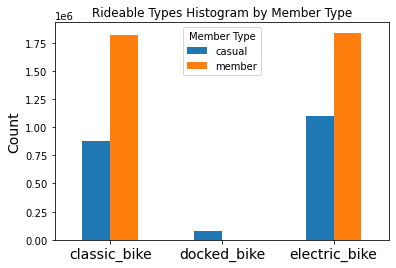

In [49]:
#35
rideable_types_df_transposed = rideable_types_df.transpose()

# Plot the transposed DataFrame
rideable_types_df_transposed.plot(kind='bar')
plt.title("Rideable Types Histogram by Member Type")
plt.tick_params(axis='x', labelsize=14, rotation=0)
plt.ylabel("Count", fontsize=14)
plt.xlabel("")
plt.legend(title="Member Type")
plt.savefig('../Report/images/rideable_types.pdf')
plt.show()